In [1]:
import timeit
from pathlib import Path


import sys
sys.path.append(str(Path.cwd().parent / "classes"))
sys.path.append(str(Path.cwd().parent))

import pandas as pd
from matplotlib import pyplot as plt

from sim_config import SimConfiguration
from simulation import Simulation
from msa import Msa


In [29]:
ROOT_SEQUENCE_LENGTH = 1000

TREES_PATH = Path.cwd() / "TRUE_TREES"
time_winners = []
measured_times: list[list[float]] = []

time_labels = ["tree", "hybrid", "blocktree", "blocklist", "naive"]


def refresh_sim(tree_file):
    sim_config = SimConfiguration(original_sequence_length=ROOT_SEQUENCE_LENGTH, indel_length_alpha=2.0,
                                indel_truncated_length=50,
                                rate_ins=0.03, rate_del=0.09,
                                deletion_extra_edge_length=5,
                                switch_factor=100,
                                seed=99)
    sim = Simulation(input_tree=str(tree_file), config=sim_config)
    return sim

for tree_path in list(TREES_PATH.iterdir())[:100]:#[0.5, 1,2,4,8,16]:

    sim = refresh_sim(tree_path)
    hybrid_time = timeit.timeit(sim.msa_from_hybrid, number=1)
    blocklist_time = timeit.timeit(sim.msa_from_blocklist, number=1)
    blocktree_time = timeit.timeit(sim.msa_from_blocktree, number=1)
    naive_time = 10000#timeit.timeit(sim.msa_from_naive, number=1)

    time_measures = [tree_path, hybrid_time, blocktree_time, blocklist_time, naive_time]
    print(time_measures)
    measured_times.append(time_measures)



[PosixPath('/home/elyawy/temp/evo-sim/benchmark/TRUE_TREES/RNF111_true_tree.txt'), 0.08468349100076011, 0.07075707799958764, 0.06970660500155645, 10000]
[PosixPath('/home/elyawy/temp/evo-sim/benchmark/TRUE_TREES/ZEB1_true_tree.txt'), 0.06686633600111236, 0.07429109700024128, 0.06660311100131366, 10000]
[PosixPath('/home/elyawy/temp/evo-sim/benchmark/TRUE_TREES/ACSL6_true_tree.txt'), 0.07465959299952374, 0.07809702299709897, 0.06928565800262731, 10000]
[PosixPath('/home/elyawy/temp/evo-sim/benchmark/TRUE_TREES/SLC51A_true_tree.txt'), 0.07476095500169322, 0.08403589699810254, 0.07262392900156556, 10000]
[PosixPath('/home/elyawy/temp/evo-sim/benchmark/TRUE_TREES/MAP2K5_true_tree.txt'), 0.06523142899823142, 0.06781254199813702, 0.06467298300049151, 10000]
[PosixPath('/home/elyawy/temp/evo-sim/benchmark/TRUE_TREES/TTC14_true_tree.txt'), 0.0698785950007732, 0.07362055799967493, 0.06619083699843031, 10000]
[PosixPath('/home/elyawy/temp/evo-sim/benchmark/TRUE_TREES/DCUN1D4_true_tree.txt'), 0.0

In [41]:
times_df = pd.DataFrame(measured_times, columns=time_labels).reset_index()

# times_df.idxmin(axis=1).value_counts()
times_df.loc[(times_df.blocklist - times_df.hybrid).idxmax()].to_list()

[np.int64(82),
 PosixPath('/home/elyawy/temp/evo-sim/benchmark/TRUE_TREES/OSBPL3_true_tree.txt'),
 np.float64(0.07385777299714391),
 np.float64(0.08020843099802732),
 np.float64(0.11559644199951435),
 np.int64(10000)]

In [51]:
times_df.iloc[:,2:].idxmin(axis=1).value_counts()


blocklist    68
hybrid       29
blocktree     3
Name: count, dtype: int64

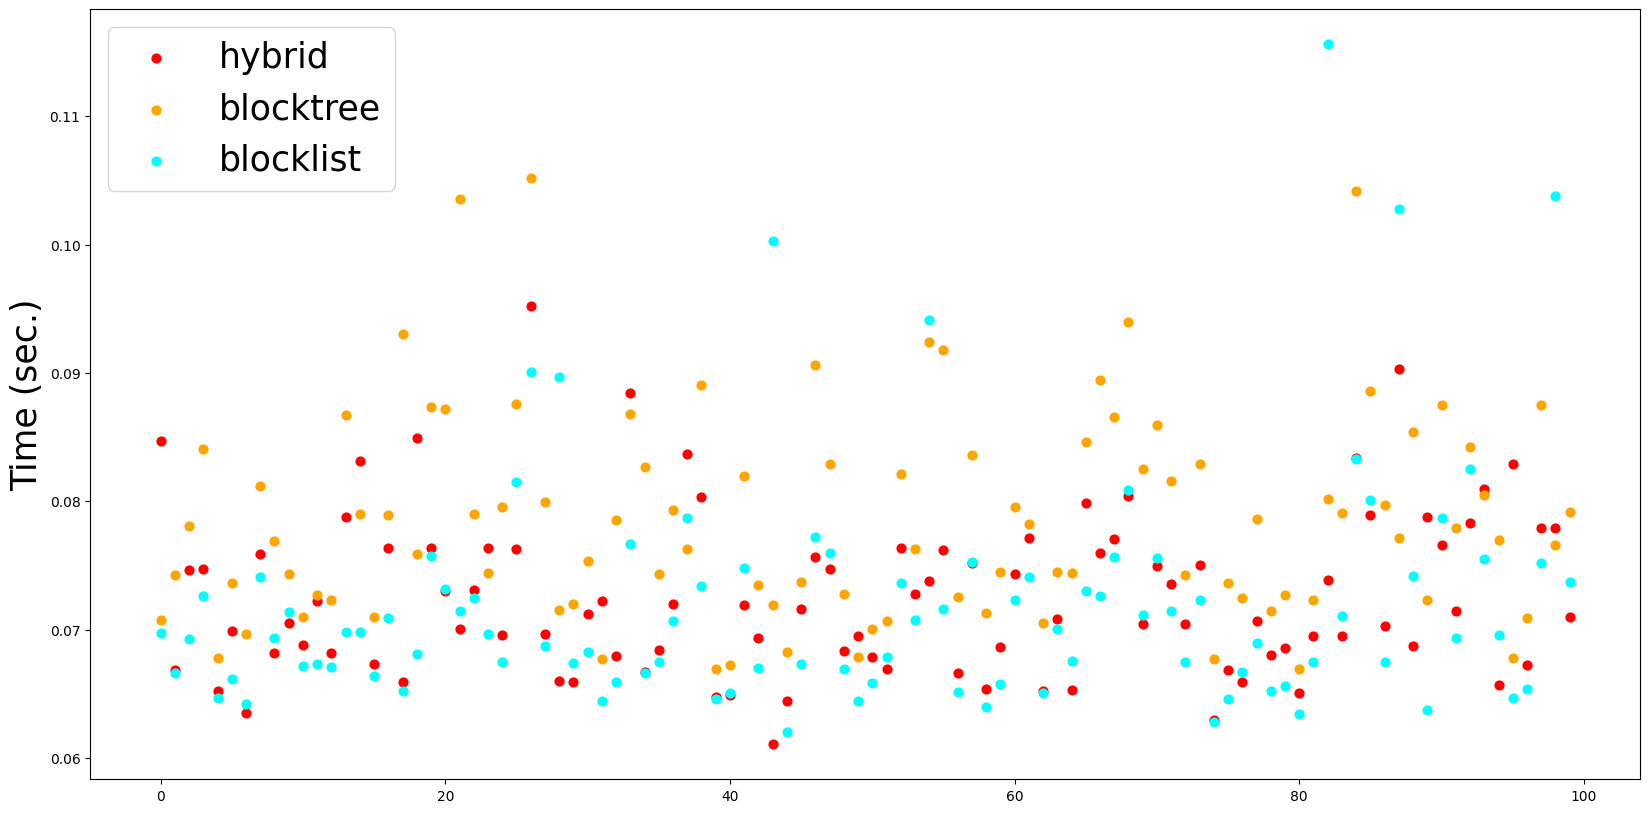

In [43]:

ax = times_df.plot.scatter(x="index", y=time_labels[1], c="red", label=time_labels[1], figsize=(20, 10), s=40)

times_df.plot.scatter(x="index", y=time_labels[2], ax=ax, c="orange", label=time_labels[2], s=40)
times_df.plot.scatter(x="index", y=time_labels[3], ax=ax, c="cyan", label=time_labels[3], s=40)
ax.set_ylabel("Time (sec.)", fontsize=25)
ax.set_xlabel("")

ax.legend(fontsize=25)
